In [1]:
%load_ext autoreload
%autoreload 2

In [144]:
import pandas as pd 
import json
import os
from dataclasses import dataclass
import datetime

from resources import MedicationOrder, Encounter, Patient, Condition

HOME_DIR = os.path.join(os.getenv('HOMEDRIVE'), os.getenv('HOMEPATH'))
data_dir = os.path.join(HOME_DIR, 'Downloads', 'synthea_sample_data_fhir_dstu2_nov2021','fhir_dstu2')
csv_dir =  os.path.join(HOME_DIR, 'Downloads', 'synthea_sample_data_csv_nov2021','csv')
files = os.listdir(data_dir)

In [198]:
with open(os.path.join(data_dir, files[10]), 'r') as f:
    data = json.load(f)

encounters = (x for x in data['entry'] if x['resource']['resourceType']=='Encounter')
medications = (x for x in data['entry'] if x['resource']['resourceType']=='MedicationOrder')
patients = (x for x in data['entry'] if x['resource']['resourceType']=='Patient')
conditions = (x for x in data['entry'] if x['resource']['resourceType']=='Condition')

In [199]:
enc_data = next(encounters)['resource']
e = Encounter(enc_data)
e.to_csv()

'33a726ac-231e-3471-8f50-698104cfb71b,1996-02-02T12:06:17-05:00,1996-02-02T12:21:17-05:00,finished,b8c195d4-0396-fb84-3aa2-57dd23ff5a23,http://snomed.info/sct,162673000,General examination of patient (procedure),9999910769,Dr. Long300 Stiedemann542,c6d61641-fb92-3b0a-b405-979248ecfb33,MILFORD REGIONAL PHYSICIAN GROUP INC'

In [ ]:
med_data = next(medications)['resource']
m = MedicationOrder(med_data)
m.to_csv()

'aec1bd7b-b4c6-8d48-06a7-a1b9def21e0d,1966-12-01T23:07:23-05:00,stopped,8c2d5e9b-0717-9616-beb9-21296a5b547d,e361ace2-ec2f-2e33-2b35-fe30d64b8b5a,9999996379,Dr. María Teresa440 León820,http://www.nlm.nih.gov/research/umls/rxnorm,2123111,NDA020503 200 ACTUAT Albuterol 0.09 MG/ACTUAT Metered Dose Inhaler'

In [ ]:
pat_data = next(patients)['resource']
p = Patient(pat_data)
p.to_csv()

'b8c195d4-0396-fb84-3aa2-57dd23ff5a23,male,1977-12-09,None,722 Bailey Harbor,Franklin,Massachusetts,02038,US,Mr.,Alexander630,Kovacek682,official,S,Black or African American,Not Hispanic or Latino,Rose199 Bechtelar572,M,0.0000,43.0000,Cambridge,Massachusetts,US,False'

In [ ]:
cond_data = next(conditions)['resource']
c = Condition(cond_data)
c.to_csv()

'150103ac-4570-1525-3e0f-d06d0ba4729c,8c2d5e9b-0717-9616-beb9-21296a5b547d,d2b71c6b-d527-368c-2ae7-ce29b59b1655,1979-02-09,http://snomed.info/sct,73595000,Stress (finding),http://hl7.org/fhir/condition-category,diagnosis,diagnosis,resolved,confirmed,1979-02-09T00:06:03-05:00,1982-02-25T23:54:56-05:00'

In [3]:
import yaml 
from io import StringIO
s = StringIO('yaml: ymal')


{'yaml': 'ymal'}

In [184]:
data_dt = '2010-03-01'
cutoff_date  = datetime.datetime.fromisoformat(data_dt).astimezone(pytz.timezone('US/Eastern'))

idx = 0
full_refresh = True

exist_data = []
if not full_refresh:
    with open('tmp_encs.csv','r') as f:
        for line in f:
            exist_data.append(line.split(',')[0])

for file in files:

    with open(os.path.join(data_dir, file), 'r', encoding='utf-8') as f:
        try:
            data = json.load(f)
        except:
            print(file)

    encounters = (x for x in data['entry'] if x['resource']['resourceType']=='Encounter')
    medications = (x for x in data['entry'] if x['resource']['resourceType']=='MedicationOrder')
    patients = (x for x in data['entry'] if x['resource']['resourceType']=='Patient')
    conditions = (x for x in data['entry'] if x['resource']['resourceType']=='Condition')

    for enc_data in encounters:
        e = Encounter(enc_data['resource'])
        if e.id in exist_data:
            continue
        if e.startTime < cutoff_date:
            if (idx == 0) and full_refresh:
                e.to_csv('tmp_encs.csv', 'w') 
            else:
                e.to_csv('tmp_encs.csv', 'a')
            idx += 1

# Second file with data_dt
i = 0
with open('tmp_encs.csv','r') as f_in:
    with open('tmp_encs_2.csv','w') as f_out:
        for line in f_in:
            l = line.rstrip('\n')
            f_out.write(f'{l},{data_dt}'+'\n')
            i += 1

In [183]:
y = """{
      "resourceType": "Encounter",
      "id": "452bac54-9377-3b59-3630-601b8a152049",
      "status": "finished",
      "class": "outpatient",
      "type": [ {
        "coding": [ {
          "system": "http://snomed.info/sct",
          "code": "698314001",
          "display": "Consultation for treatment"
        } ],
        "text": "Consultation for treatment"
      } ],
      "patient": {
        "reference": "urn:uuid:05877654-69c4-d607-400e-e162ea103642"
      },
      "participant": [ {
        "individual": {
          "reference": "Practitioner?identifier=http://hl7.org/fhir/sid/us-npi|9999999479",
          "display": "Dr. Demetrice140 Crooks415"
        }
      } ],
      "period": {
        "start": "2011-01-25T01:48:22-05:00",
        "end": "2011-01-25T02:03:22-05:00"
      },
      "serviceProvider": {
        "reference": "Organization?identifier=https://github.com/synthetichealth/synthea|6f122869-a856-3d65-8db9-099bf4f5bbb8",
        "display": "LAHEY HOSPITAL & MEDICAL CENTER, BURLINGTON"
      }
    }
    """
from resources import Encounter
e = Encounter(json.loads(y)) 
e.to_csv()

'452bac54-9377-3b59-3630-601b8a152049,2011-01-25T01:48:22-05:00,2011-01-25T02:03:22-05:00,finished,05877654-69c4-d607-400e-e162ea103642,http://snomed.info/sct,698314001,Consultation for treatment,9999999479,Dr. Demetrice140 Crooks415,6f122869-a856-3d65-8db9-099bf4f5bbb8,"LAHEY HOSPITAL & MEDICAL CENTER, BURLINGTON"'

<AxesSubplot:xlabel='START'>

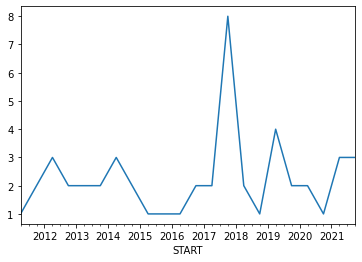

In [8]:
import datetime
import pandas as pd
csv_files = os.listdir(csv_dir)
df = pd.read_csv(os.path.join(csv_dir,'encounters.csv'))
df1 = df[df.DESCRIPTION.str.contains("asthma")]

df1 = df1[["START"]].astype('datetime64').sort_values(by='START')
df1['START'] = df1.START.dt.date
df1 = df1.reset_index().set_index('START')
df1['n'] = 1
# df1 = df1.astype('datetime64')
df1.index = pd.DatetimeIndex(df1.index)

df1[df1.index > datetime.datetime(2009,1,1)].groupby(pd.Grouper(freq='2Q')).n.sum().plot.line()


In [9]:
df_asthma = df[df.DESCRIPTION.str.contains("asthma")]
n_pat = df_asthma.PATIENT.value_counts().to_dict()
vals =  df_asthma.PATIENT.map(n_pat)
df_asthma = df_asthma.reset_index().drop('index', axis=1)
df_asthma['n_adm'] = vals.values

df_asthma.sort_values(['n_adm','START'], ascending=[0,1]).loc[:,['START','n_adm','PATIENT']]

# df_asthma[['PATIENT','START']].value_counts()

,START,n_adm,PATIENT
12,2013-02-15T03:04:14Z,4,426cade9-82be-f335-7340-c4413e4bdd6a
13,2017-07-27T01:04:14Z,4,426cade9-82be-f335-7340-c4413e4bdd6a
14,2019-01-20T17:04:14Z,4,426cade9-82be-f335-7340-c4413e4bdd6a
15,2019-07-21T13:04:14Z,4,426cade9-82be-f335-7340-c4413e4bdd6a
16,1941-12-30T10:04:43Z,3,ae59c2c9-648d-6f76-2d42-a1b8cac21c8b
17,1942-06-30T21:04:43Z,3,ae59c2c9-648d-6f76-2d42-a1b8cac21c8b
18,1944-06-21T10:04:43Z,3,ae59c2c9-648d-6f76-2d42-a1b8cac21c8b
5,2012-06-15T22:03:20Z,3,50aac3ff-d836-adfd-620d-662fa08fdf55
36,2012-10-10T10:57:14Z,3,eebbb6c9-87b3-9978-5eab-84edacbccc7c
29,2013-09-25T19:02:17Z,3,863410e4-cd33-2f03-47b6-01fa2bc39753


In [10]:
df1 = df[['PATIENT','DESCRIPTION']].drop_duplicates()
df1[df1.DESCRIPTION.str.contains('disorder')].DESCRIPTION.value_counts()

Allergic disorder initial assessment      53
Allergic disorder follow-up assessment    31
posttraumatic stress disorder              5
Name: DESCRIPTION, dtype: int64